In [12]:
pip install -q 'gwosc==0.7.1'

In [13]:
pip install -q pycbc

In [14]:
pip install -q 'gwpy==3.0.12'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 16.5 MB/s eta 0:00:00


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries

In [16]:
fs = 4096
duration = 30
samples = fs * duration

In [17]:
#Gaussian Noise
noise_array = np.random.normal(0, 1e-23, samples)
noise = TimeSeries(noise_array, dt=1/fs)

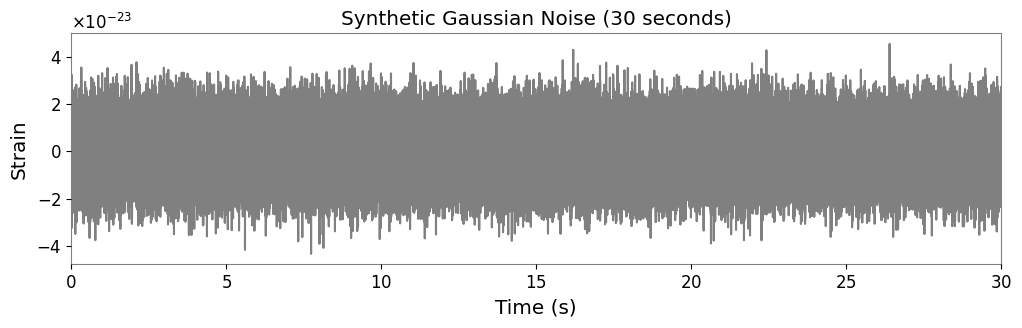

In [18]:
plt.figure(figsize=(12, 3))
plt.plot(noise.times.value, noise.value, color='gray')
plt.title("Synthetic Gaussian Noise (30 seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.xlim(0, duration)
plt.grid()
plt.show()

In [19]:
#synthetic waveform
hp, hc = get_td_waveform(approximant='SEOBNRv4',
                         mass1=30,
                         mass2=30,
                         delta_t=1/fs,
                         distance=500,
                         f_lower=30)
injection_start = 10
signal = TimeSeries(hp, dt=1/fs, t0=injection_start)

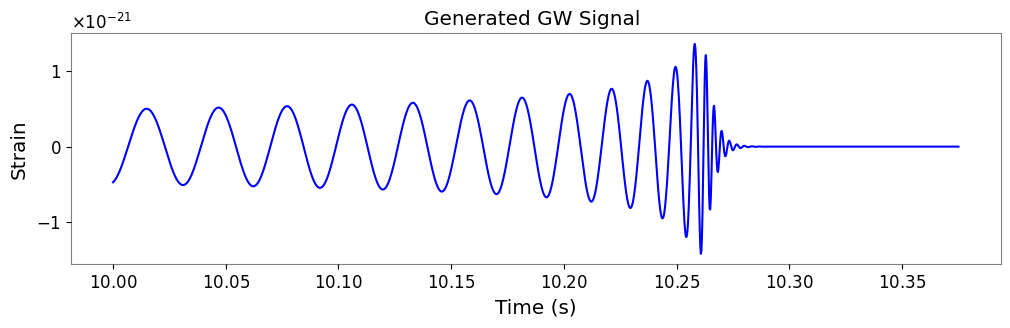

In [20]:
plt.figure(figsize=(12, 3))
plt.plot(signal.times.value, signal.value, color='blue')
plt.title("Generated GW Signal ")
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.grid()
plt.show()

In [21]:
signal_raw = TimeSeries(hp, dt=1/fs, t0=injection_start)
signal_rms = np.sqrt(np.mean(signal_raw.value**2))
noise_rms = np.sqrt(np.mean(noise.value**2))

scaling_factor = noise_rms / signal_rms
signal = signal_raw * scaling_factor

print(f"Signal RMS: {signal_rms:.2e}, Noise RMS: {noise_rms:.2e}, Scaling: {scaling_factor:.2f}")

Signal RMS: 4.03e-22, Noise RMS: 9.98e-24, Scaling: 0.02


In [22]:
data_with_signal = noise.inject(signal)

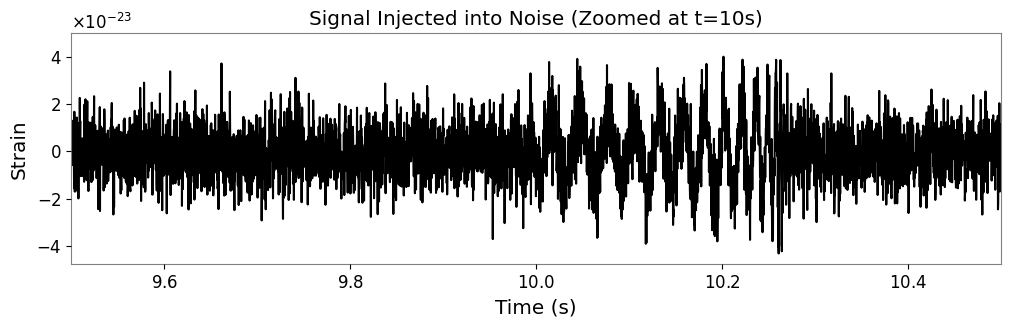

In [23]:
plt.figure(figsize=(12, 3))
plt.plot(data_with_signal.times.value, data_with_signal.value, color='black')
plt.title("Signal Injected into Noise (Zoomed at t=10s)")
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.xlim(injection_start - 0.5, injection_start + 0.5)
plt.grid()
plt.show()

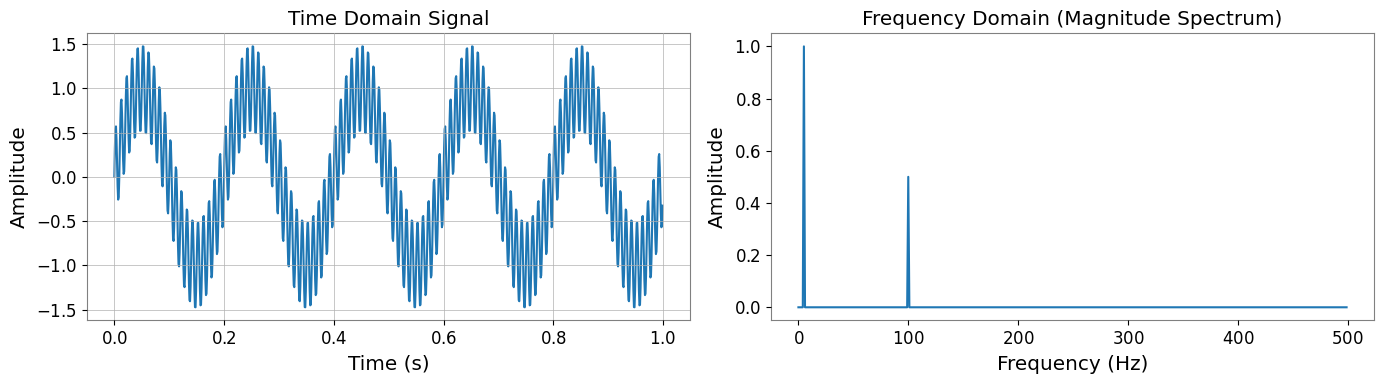

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Make a signal: 5 Hz + 10 Hz sine wave
fs = 1000  # Sampling rate
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*100*t)

# Frequency domain
N = len(signal)
fft_values = fft(signal)
frequencies = fftfreq(N, 1/fs)

# Plot
plt.figure(figsize=(14,4))

# Time domain
plt.subplot(1,2,1)
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency domain
plt.subplot(1,2,2)
plt.plot(frequencies[:N//2], np.abs(fft_values)[:N//2] * 2 / N)
plt.title("Frequency Domain (Magnitude Spectrum)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()
